# Classification

Classification is the supervised learning task of predicting the value of a categorical outcome ("class") variable, _y_, given real and/or categorical input ("feature") data, _X_. The objective of classification is to learn a model of the data that can be use to predict the correct class variable for new or unseen feature data.

A variety of classification algorithms exist. These algorithms have been developed under varying assumptions and employ different concepts. Each algorithm may interact with data differently based upon the size, dimensionality, and noise of the dataset, among other characteristics. These algorithms may have varying degrees of interpretability, variability, and bias.

Here, we'll use the scikit-learn (sklearn) package to expore the use of several classification algorithms. Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [1]:
import numpy as np
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

X = data.iloc[:, :2]  # features
y = data.iloc[:, -1]  # class

print(X.head())
print()
print(y.head())

   Sepal Length  Sepal Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## _k_-Nearest Neighbors

One of the simplest classification algorithms is the _k_-nearest neighbors algorithm. Let's import it from `sklearn`. We can call the method with several available inputs. Here, we specify the number of neighbors _k_ to consider.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)

Every classifier in `sklearn` has a `fit()` method. For a supervised learning algorithm, which learns to map features _X_ to classes _y_, we must input the corresponding _X_ and _y_ data.

In [4]:
clf_knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

We call an algorithm fit (or parameterized) to input data a "model." Can now use the fitted model to predict the class _y_ given new features _X_.

Here, we'll simply see how well the classifier can predict the data on which it was fit. We can predict on feature data using the fitted model's `predict()` method, the output of which are corresponding class predictions:

In [5]:
y_pred = clf_knn.predict(X)
clf_knn.kneighbors(X);

We can compare the actual values, `y`, to the predicted values, `y_pred`. Here we compute the fraction of times that they match:

In [6]:
print(np.average(y == y_pred))

0.853333333333


In [7]:
print(data.iloc[51, 0:2], data.iloc[51, -1])
print()
print(data.iloc[115, 0:2], data.iloc[115, -1])

Sepal Length    6.4
Sepal Width     3.2
Name: 51, dtype: object Iris-versicolor

Sepal Length    6.4
Sepal Width     3.2
Name: 115, dtype: object Iris-virginica


Let's try visualizing the results. We can use another Python package, `matplotlib`, to generate these visualizations.

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
% matplotlib inline

In [9]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

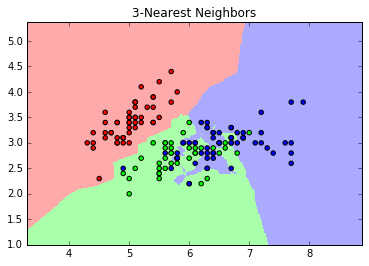

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Nearest Neighbors")

Let's try fitting an visualizing another classifier, Gaussian Naive Byaes.

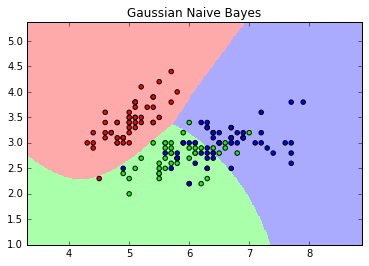

In [11]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf_gnb.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Gaussian Naive Bayes")

Now, when building a model, we're typically interested in performance on data we haven't yet seen. A simple model that simply memorizes the training data may perform well on the data we've seen but poorly on unseen data. Unless we can evaluate a model on unseen data, we don't know how accurate its predictions may be.

To address this issue, we can separate the data into training and testing sets. We can fit the model on the training data and then evaluate it on the separate testing data. `sklearn` provides a convenient function to do this. Let's save 20% of our data for testing, and use the rest for fitting our models.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_knn.fit(X_train, y_train)
clf_gnb.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
y_pred_gnb = clf_gnb.predict(X_test)

print(np.average(y_test == y_pred_knn))
print(np.average(y_test == y_pred_gnb))

0.633333333333
0.733333333333


Let's try viewing the results from a decision tree classifier. As decision trees apply axis-parallel splits, we should find that every decision boundary is parallel to an axis; no diagonal decision regions should exist.

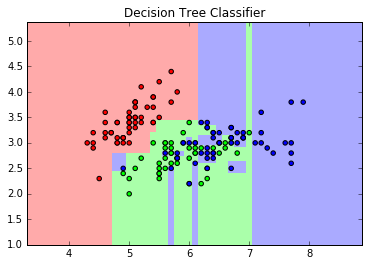

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf_dtc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Tree Classifier")

## Housing Dataset

Let's practice applying what we've learned to a house price dataset for Ames, Iowa.

In [14]:
df_houses = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')
print(df_houses.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL           141     31770   Pave   
1      2  526350040           20        RH            80     11622   Pave   
2      3  526351010           20        RL            81     14267   Pave   
3      4  526353030           20        RL            93     11160   Pave   
4      5  527105010           60        RL            74     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    20

### 1. Drop or fill missing values. Consider how to handle the following columns, which have many missing values: `Alley`, `Fence`, `Fireplace Qu`, `Misc Feature`, `Pool QC`.

In [15]:
# Code goes here.

### 2. Separate the features and the class.

In [16]:
# Code goes here.

### 3. Transform the features to dummy variables.

In [17]:
# Code goes here.

### 3. Bin the SalePrice into two outcomes, 'high' or 'low'.

In [18]:
# Code goes here.

### 4. Split the dataset into 80% training data and 20% testing data. Each row should consist of the features, `X`, and the binned sales price, `y`.

In [19]:
# Code goes here.

### 5. Fit two models: a 5-nearest neighbors classifier and a 500-nearest neighbors classifier. Fit them both on the training data. Use all of the feature data, excluding the sales price, to predict the binned sales price.

In [20]:
# Code goes here.

### 6. Compare the accuracy of the _k_-nearest neighbors classifiers on the test data. 

In [21]:
# Code goes here.

### 7. Fit a Gaussian naive Bayes classifier on the training data. Compare the accuray of the perceptron with the accuracy of the _k_-nearest neighbors classifiers on the test data.

In [22]:
# Code goes here.